Nama : Brian Cindya Richmahayu
NIM : 4101422095

Data : "Thyroid Cancer Recurrence"

Preprocessing Data

In [90]:
# 1. Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [91]:
# 2. Load data
df = pd.read_csv('thyroid_data.csv')

In [92]:
# 3. Tampilkan info dasar
print("Informasi dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())
print("\nContoh data:")
print(df.head())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB
None

Statistik deskriptif:
              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.00

In [93]:
df.tail(15)

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
368,56,F,No,Posterior,Papillary,Multi-Focal,High,T4a,N1b,M0,II,Structural Incomplete,Yes
369,71,M,No,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes
370,78,M,Yes,No,Follicular,Multi-Focal,High,T4a,N0,M1,IVB,Structural Incomplete,Yes
371,51,F,No,No,Papillary,Multi-Focal,High,T4a,N1a,M1,II,Structural Incomplete,Yes
372,67,F,No,No,Papillary,Multi-Focal,High,T4a,N0,M0,IVA,Biochemical Incomplete,Yes
373,31,M,Yes,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes
374,62,M,No,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
375,59,F,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes
376,40,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes
377,46,M,No,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes


In [94]:
# 4. Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64


In [95]:
df.duplicated().sum()

np.int64(53)

In [96]:
df.drop_duplicates(inplace = True)

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
# 5. Tampilkan hasil akhir
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   Age Gender Hx Radiothreapy Adenopathy       Pathology     Focality Risk  \
0   27      F              No         No  Micropapillary    Uni-Focal  Low   
1   34      F              No         No  Micropapillary    Uni-Focal  Low   
2   30      F              No         No  Micropapillary    Uni-Focal  Low   
3   62      F              No         No  Micropapillary    Uni-Focal  Low   
4   62      F              No         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No  


 **Langkah-langkah pemodelan Klasifikasi **
 1. Import Library: Pertama, kita import semua library Python yang dibutuhkan, seperti:pandas, numpy untuk manipulasi data,
 sklearn untuk preprocessing, pembagian data, model machine learning, dan evaluasi,
 seaborn, matplotlib untuk visualisasi.
 2. Load dan Persiapkan Dataset: Dataset yang digunakan adalah thyroid_data.csv. Kita muat dataset tersebut menggunakan pandas.read_csv(). Lalu kita lihat struktur data, tipe data, dan jumlah nilai null jika ada.
 3. Preprocessing Data
(a) Encoding: Kolom kategorikal diubah menjadi numerik menggunakan LabelEncoder.
(b)Normalisasi: Kolom numerik seperti Age dinormalisasi dengan StandardScaler agar memiliki skala yang seragam.
(c)Split Data: Dataset dibagi menjadi data latih (training) dan data uji (testing) dengan proporsi 80%:20% menggunakan train_test_split.

**Model Naive Bayes**

Langkah-langkah:

1. Gunakan GaussianNB dari sklearn.naive_bayes.

2. Latih model dengan fit(X_train, y_train).

3. Lakukan prediksi terhadap data uji menggunakan predict(X_test).

4. Evaluasi model : Langkah ini digunakan untuk mengevaluasi seberapa baik model dalam mengklasifikasi data. Kita melihat akurasi keseluruhan, serta precision, recall, F1-score, dan visualisasi confusion matrix.

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Akurasi Naive Bayes: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.73      0.84        26

    accuracy                           0.91        77
   macro avg       0.94      0.87      0.89        77
weighted avg       0.92      0.91      0.90        77



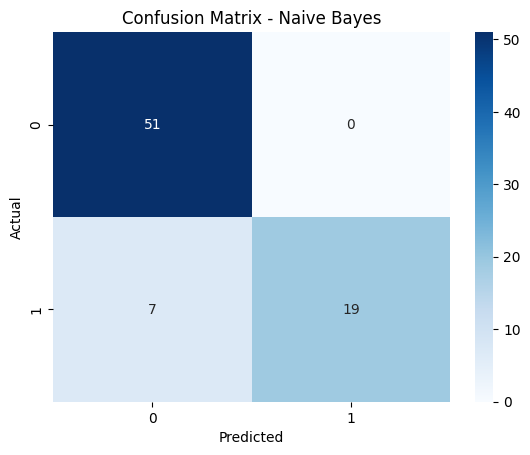

In [100]:
# Latih model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Akurasi Naive Bayes:", acc_nb)
print(classification_report(y_test, y_pred_nb))

# Visualisasi
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Model KNN**

Langkah-langkah:

1. Gunakan KNeighborsClassifier dari sklearn.neighbors, misalnya dengan k=5 yang artinya model akan melihat 5 tetangga terdekat untuk menentukan kelas dari data uji.

2. Latih model dan prediksi seperti pada Naive Bayes.

3. Evaluasi model : langkah ini mengevaluasi performa model menggunakan akurasi, precision, recall, dan F1-score. Confusion matrix divisualisasikan agar mudah dilihat.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Akurasi KNN: 0.922077922077922
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.95      0.81      0.88        26

    accuracy                           0.92        77
   macro avg       0.93      0.89      0.91        77
weighted avg       0.92      0.92      0.92        77



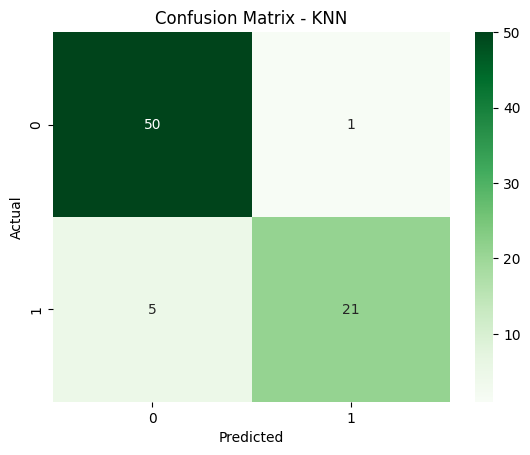

In [102]:
# Latih model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Akurasi KNN:", acc_knn)
print(classification_report(y_test, y_pred_knn))

# Visualisasi
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Perbandingan Hasil**

In [103]:
print(f"Akurasi Naive Bayes: {acc_nb:.4f}")
print(f"Akurasi KNN        : {acc_knn:.4f}")

Akurasi Naive Bayes: 0.9091
Akurasi KNN        : 0.9221


Output dari Akurasi Naive Bayes 0.9091  yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.9091 berarti bahwa model berhasil memprediksi dengan benar sekitar 90,91% dari semua sampel pada data uji (y_test) yang telah digunakan.

Output dari Akurasi KNN 0.9221 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.9221 berarti bahwa model berhasil memprediksi dengan benar sekitar 92,21% dari semua sampel pada data uji (y_test) yang telah digunakan.